# Code Clause

Sakshi Shete - Data Science Intern

Task1 - Sentiment Analysis

Sentiment Analysis is a act of anlayzing words to determine sentiments and opinions that may be positive or negative in priority.

Link for Dataset: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset?resource=download


In [1]:
pip install pandas matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
df = pd.read_csv(r'C:\\Users\\Acer\\Downloads\\test.csv',encoding= 'unicode_escape')
df.text=df.text.astype(str)
df.head          

<bound method NDFrame.head of           textID                                               text sentiment  \
0     f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1     96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2     eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3     01082688c6                                        happy bday!  positive   
4     33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
...          ...                                                ...       ...   
4810         NaN                                                nan       NaN   
4811         NaN                                                nan       NaN   
4812         NaN                                                nan       NaN   
4813         NaN                                                nan       NaN   
4814         NaN                                                nan       NaN  

In [22]:
review_df = df[['text','sentiment']]
print(review_df.shape)
review_df.head(5)

(4815, 2)


,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [23]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

In [24]:
review_df = review_df[review_df['sentiment']!= "neutral"]

print(review_df.shape)
review_df.head(5)

(3385, 2)


,text,sentiment
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
5,that`s great!! weee!! visitors!,positive


In [25]:
review_df['sentiment'].value_counts()

positive    1103
negative    1001
Name: sentiment, dtype: int64

In [26]:
sentiment_label = review_df.sentiment.factorize()
sentiment_label

(array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [27]:
tweet = review_df.text.values

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 2000)

tokenizer.fit_on_texts(tweet)

In [29]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size =   45015
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1440480   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,457,131
Trainable params: 1,457,131
Non-trainable params: 0
______________________________________________

In [41]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.5, epochs=5, batch_size=32)

Epoch 1/5
53/53 [==============================] - 11s 202ms/step - loss: 0.4235 - accuracy: 0.8487 - val_loss: -25.0240 - val_accuracy: 0.2250
Epoch 2/5
53/53 [==============================] - 11s 210ms/step - loss: 0.3253 - accuracy: 0.8948 - val_loss: -24.7821 - val_accuracy: 0.2292
Epoch 3/5
53/53 [==============================] - 11s 205ms/step - loss: 0.2462 - accuracy: 0.9232 - val_loss: -24.5330 - val_accuracy: 0.2274
Epoch 4/5
53/53 [==============================] - 11s 202ms/step - loss: 0.2305 - accuracy: 0.9238 - val_loss: -24.2416 - val_accuracy: 0.2245
Epoch 5/5
53/53 [==============================] - 11s 203ms/step - loss: 0.2096 - accuracy: 0.9273 - val_loss: -23.9874 - val_accuracy: 0.2221


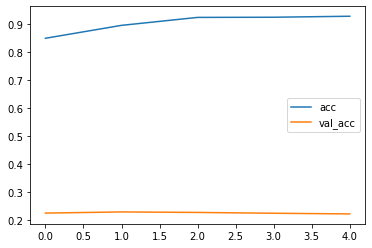

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

plt.savefig("plot.jpg")

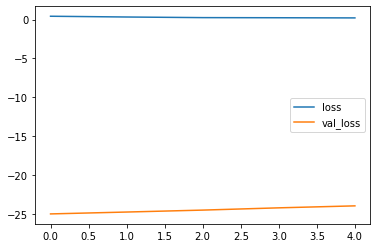

<Figure size 432x288 with 0 Axes>

In [43]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [44]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label:",sentiment_label[1][prediction])
    
test_sentence1 = "I`m sorry  at least it`s Friday?"
predict_sentiment(test_sentence1)

test_sentence2 = "You seem nice, you`re generous and you know your stuff"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 45ms/step
Predicted label: negative
1/1 [==============================] - 0s 38ms/step
Predicted label: positive
